
# Monte Carlo Simulations: Simulating Interest Rate Paths for Bond Valuation

## Overview
Monte Carlo simulations are powerful tools for evaluating bond and portfolio valuations under uncertainty. By simulating numerous interest rate paths, investors can assess the potential range of bond prices and portfolio values, accounting for the inherent uncertainty in interest rate movements.

In this notebook, we will:

- **Understand Monte Carlo Simulations**: Explore the basics of Monte Carlo methods and their application in fixed income.
- **Simulate Interest Rate Paths**: Use a stochastic model to generate multiple interest rate paths.
- **Example Bond Valuation**: Calculate a hypothetical bond's value under different simulated interest rate paths.

Monte Carlo simulations provide insights into potential outcomes for bond portfolios, helping investors assess risk and make data-driven decisions.



## 1. Basics of Monte Carlo Simulations in Fixed Income

Monte Carlo simulations use random sampling to generate a wide range of possible outcomes based on input parameters. In fixed income, this typically involves:

- **Interest Rate Path Simulation**: Using stochastic processes (such as the Vasicek or Cox-Ingersoll-Ross models) to simulate multiple paths for interest rates.
- **Bond Price Calculation**: Evaluating how different interest rate paths impact bond prices and portfolio values.
- **Risk Assessment**: Understanding the distribution of potential outcomes to gauge the risks in bond portfolios.

Monte Carlo methods are widely used to evaluate bonds under uncertainty, providing a probabilistic view of potential future values.



## 2. Simulating Interest Rate Paths Using the Vasicek Model

Consider a bond with the following parameters:

- Face Value: $1,000
- Annual Coupon Rate: 4%
- Maturity: 5 years

We will use the Vasicek model to simulate interest rate paths and calculate the bond's value under each path.

### Vasicek Model Parameters
- **Initial Interest Rate (r0)**: 2%
- **Mean Reversion Level (theta)**: 3%
- **Mean Reversion Speed (kappa)**: 0.15
- **Volatility (sigma)**: 0.02


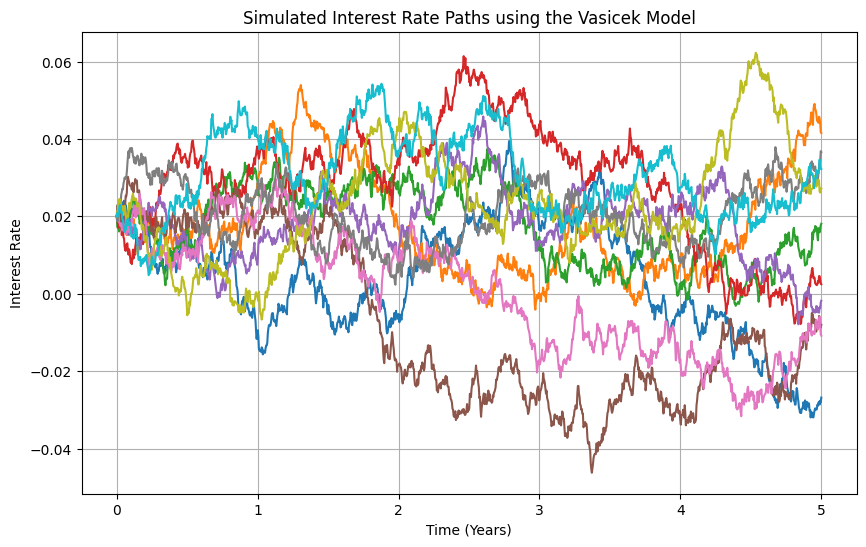

In [7]:

import numpy as np
import matplotlib.pyplot as plt

# Vasicek model parameters
r0 = 0.02         # Initial interest rate
theta = 0.03      # Mean reversion level
kappa = 0.15      # Mean reversion speed
sigma = 0.02      # Volatility
T = 5             # Time horizon in years
dt = 1/252        # Time step (daily)
num_simulations = 1000  # Number of simulations

# Generate Monte Carlo simulations of interest rate paths
def vasicek_simulation(r0, kappa, theta, sigma, T, dt, num_simulations):
    num_steps = int(T / dt)
    rates = np.zeros((num_simulations, num_steps))
    rates[:, 0] = r0
    for t in range(1, num_steps):
        dr = kappa * (theta - rates[:, t-1]) * dt + sigma * np.sqrt(dt) * np.random.normal(size=num_simulations)
        rates[:, t] = rates[:, t-1] + dr
    return rates

# Simulate interest rate paths
interest_rate_paths = vasicek_simulation(r0, kappa, theta, sigma, T, dt, num_simulations)

# Plot a few simulated paths
plt.figure(figsize=(10, 6))
for i in range(10):  # Plot only 10 paths for clarity
    plt.plot(np.linspace(0, T, int(T/dt)), interest_rate_paths[i])
plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")
plt.title("Simulated Interest Rate Paths using the Vasicek Model")
plt.grid(True)
plt.show()



## 3. Bond Valuation Under Simulated Interest Rate Paths

Using the simulated interest rate paths, we will calculate the present value of a hypothetical bond with annual coupon payments. By averaging across all simulations, we obtain an estimate of the bond's value under uncertainty.


In [2]:

# Bond parameters
face_value = 1000
coupon_rate = 0.04
maturity = 5

# Calculate bond price for each interest rate path
bond_prices = np.zeros(num_simulations)
for i in range(num_simulations):
    discount_factors = np.exp(-np.cumsum(interest_rate_paths[i, :int(maturity/dt)]) * dt)
    cash_flows = np.ones(int(maturity/dt)) * coupon_rate * face_value * dt
    cash_flows[-1] += face_value  # Add face value at maturity
    bond_prices[i] = np.sum(cash_flows * discount_factors)

# Average bond price across simulations
estimated_bond_price = np.mean(bond_prices)
print(f"Estimated Bond Price (Monte Carlo Simulation): ${estimated_bond_price:.2f}")


Estimated Bond Price (Monte Carlo Simulation): $1083.54



## Summary

In this notebook, we covered:

- **Basics of Monte Carlo Simulations**: Understanding their role in simulating bond and portfolio valuations under uncertainty.
- **Interest Rate Path Simulation**: Using the Vasicek model to generate interest rate paths.
- **Bond Valuation**: Calculating the bond's estimated value under simulated rate paths.

Monte Carlo simulations provide a robust framework for evaluating fixed income portfolios, offering a probabilistic view of potential future valuations.
